In [101]:
import ROOT

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Info in <TCanvas::Print>: png file mc_to_fit/JpsiDstar_MC_2017.png has been created


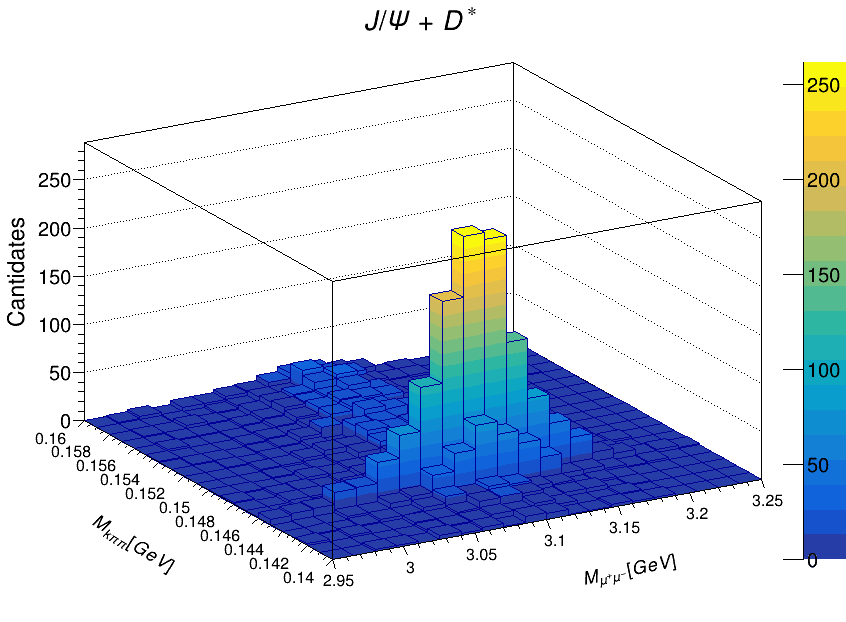

In [102]:
# Path to the root files
path = 'mc_to_fit/'
# Monte Carlo year
year = '2017'

# Creates a chain with the root files.
chain = ROOT.TChain("JpsiDstar")
chain.Add(path + "JpsiDstar_MC_" + year +".root")

# Takes the variables as arrays
dstar_mass = chain.AsMatrix(["dstar_dmass"])
jpsi_mass = chain.AsMatrix(["jpsi_mass"])

# Creates the histogram and draw chain
hist = ROOT.TH2D('h1', '$J/\Psi + D^* $; ;; ', 20, 2.95, 3.25, 20, 0.14, 0.16)
chain.Draw("dstar_dmass:jpsi_mass>>h1")

# Change the size of the axis in order to fit it well
x = hist.GetXaxis()
x.SetLabelSize(0.028)
y = hist.GetYaxis()
y.SetLabelSize(0.028)

# Canvas Definition
can = ROOT.TCanvas("can", "histograms", 850, 650)
can.Draw()

hist.SetStats(False)
hist.Draw("lego2z")

# Jpsi axis (x axis)
jpsi_ax = ROOT.TLatex()
jpsi_ax.SetNDC()
jpsi_ax.SetTextFont(43)
jpsi_ax.SetTextSize(20)
jpsi_ax.SetTextAlign(31)
jpsi_ax.SetTextAngle(11)
jpsi_ax.DrawLatex(.8,0.09, "M_{\mu^+\mu^-} [GeV]")

# D* axis (y axis)
dstar_ax = ROOT.TLatex()
dstar_ax.SetNDC()
dstar_ax.SetTextFont(43)
dstar_ax.SetTextSize(20)
dstar_ax.SetTextAlign(31)
dstar_ax.SetTextAngle(-32)
dstar_ax.DrawLatex(0.2,0.08, "M_{k\pi\pi} [GeV]")

# Candidates (z axis)
candidates_ax = ROOT.TLatex()
candidates_ax.SetNDC()
candidates_ax.SetTextFont(43)
candidates_ax.SetTextSize(25)
candidates_ax.SetTextAlign(31)
candidates_ax.SetTextAngle(90)
candidates_ax.DrawLatex(0.03,0.65, "Cantidates")

ROOT.gPad.Update()

PaletteAxis = hist.GetListOfFunctions().FindObject("palette")
PaletteAxis.SetX1NDC(1.4)
PaletteAxis.SetX2NDC(0.95)

can.Update()
can.SaveAs(path + "JpsiDstar_MC_" + year + ".png")

In [100]:
del(hist)
del(can)